## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [8]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [15]:
"""Code Here
設定超參數
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.5

In [16]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["acc"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===========

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 8s 151us/step - loss: 1.9813 - acc: 0.2916 - val_loss: 1.8678 - val_acc: 0.3367
Epoch 2/50
50000/50000 [==============================] - 8s 151us/step - loss: 1.8071 - acc: 0.3606 - val_loss: 1.7752 - val_acc: 0.3621
Epoch 3/50
50000/50000 [==============================] - 7s 148us/step - loss: 1.7328 - acc: 0.3878 - val_loss: 1.6961 - val_acc: 0.3978
Epoch 4/50
50000/50000 [==============================] - 8s 166us/step - loss: 1.6809 - acc: 0.4052 - val_loss: 1.7071 - val_acc: 0.3928
Epoch 5/50
50000/50000 [==============================] - 8s 168us/step - loss: 1.6394 - acc: 0.4223 - val_loss: 1.6994 - val_acc: 0.3958
Epoch 6/50
50000/50000 [==============================] - 8s 153us/step - loss: 1.6070 - acc: 0.4345 - val_loss: 1.6702 - val_acc: 0.4117
Epoch 7/50
50000/50000 [==============================] - 9s 180us/step - loss: 1.5758 - acc: 0.4440 - val_loss: 1.5684 - 

Epoch 2/50
50000/50000 [==============================] - 7s 137us/step - loss: 2.0955 - acc: 0.2531 - val_loss: 2.0517 - val_acc: 0.2788
Epoch 3/50
50000/50000 [==============================] - 7s 136us/step - loss: 2.0157 - acc: 0.2878 - val_loss: 1.9877 - val_acc: 0.3025
Epoch 4/50
50000/50000 [==============================] - 7s 139us/step - loss: 1.9621 - acc: 0.3099 - val_loss: 1.9431 - val_acc: 0.3214
Epoch 5/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.9242 - acc: 0.3252 - val_loss: 1.9109 - val_acc: 0.3273
Epoch 6/50
50000/50000 [==============================] - 7s 139us/step - loss: 1.8951 - acc: 0.3362 - val_loss: 1.8846 - val_acc: 0.3412
Epoch 7/50
50000/50000 [==============================] - 7s 138us/step - loss: 1.8716 - acc: 0.3428 - val_loss: 1.8676 - val_acc: 0.3460
Epoch 8/50
50000/50000 [==============================] - 7s 138us/step - loss: 1.8526 - acc: 0.3513 - val_loss: 1.8494 - val_acc: 0.3465
Epoch 9/50
50000/50000 [==========

50000/50000 [==============================] - 7s 137us/step - loss: 2.2522 - acc: 0.1439 - val_loss: 2.2429 - val_acc: 0.1568
Epoch 4/50
50000/50000 [==============================] - 7s 137us/step - loss: 2.2351 - acc: 0.1614 - val_loss: 2.2269 - val_acc: 0.1707
Epoch 5/50
50000/50000 [==============================] - 7s 139us/step - loss: 2.2199 - acc: 0.1771 - val_loss: 2.2123 - val_acc: 0.1889
Epoch 6/50
50000/50000 [==============================] - 7s 137us/step - loss: 2.2056 - acc: 0.1937 - val_loss: 2.1986 - val_acc: 0.1997
Epoch 7/50
50000/50000 [==============================] - 7s 140us/step - loss: 2.1923 - acc: 0.2043 - val_loss: 2.1857 - val_acc: 0.2127
Epoch 8/50
50000/50000 [==============================] - 7s 137us/step - loss: 2.1795 - acc: 0.2160 - val_loss: 2.1733 - val_acc: 0.2215
Epoch 9/50
50000/50000 [==============================] - 7s 141us/step - loss: 2.1674 - acc: 0.2260 - val_loss: 2.1615 - val_acc: 0.2328
Epoch 10/50
50000/50000 [====================

50000/50000 [==============================] - 7s 137us/step - loss: 2.3277 - acc: 0.1165 - val_loss: 2.3243 - val_acc: 0.1147
Epoch 5/50
50000/50000 [==============================] - 7s 139us/step - loss: 2.3200 - acc: 0.1231 - val_loss: 2.3170 - val_acc: 0.1208
Epoch 6/50
50000/50000 [==============================] - 7s 137us/step - loss: 2.3133 - acc: 0.1287 - val_loss: 2.3107 - val_acc: 0.1268
Epoch 7/50
50000/50000 [==============================] - 7s 137us/step - loss: 2.3076 - acc: 0.1320 - val_loss: 2.3052 - val_acc: 0.1312
Epoch 8/50
50000/50000 [==============================] - 7s 139us/step - loss: 2.3026 - acc: 0.1346 - val_loss: 2.3004 - val_acc: 0.1332
Epoch 9/50
50000/50000 [==============================] - 7s 140us/step - loss: 2.2981 - acc: 0.1359 - val_loss: 2.2961 - val_acc: 0.1354
Epoch 10/50
50000/50000 [==============================] - 7s 142us/step - loss: 2.2941 - acc: 0.1369 - val_loss: 2.2923 - val_acc: 0.1368
Epoch 11/50
50000/50000 [===================

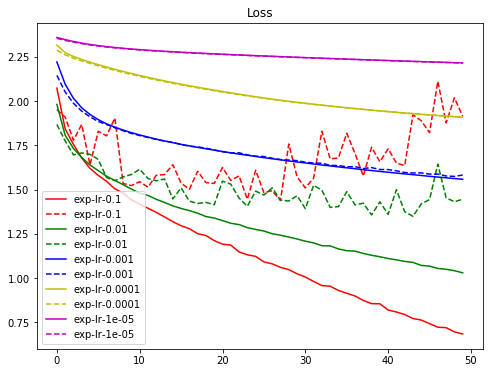

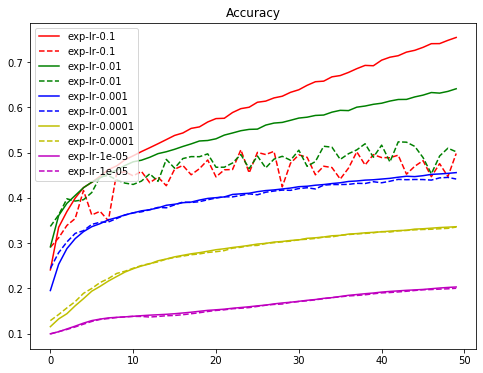

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

plt.show()